In [3]:
%pip install pandas 
%pip install numpy
%pip instal matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "instal" - maybe you meant "install"



In [4]:
df = pd.read_csv(r"clean_GURS\new_prodaja2024.csv", sep=',', encoding='utf-8')
df.sample(10)

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,LETO,cena,novogradnja,house_or_apartment
625,ČRNUČE,LJUBLJANA,2023,62.9,52.1,2024,197395,1.0,2
1007,ZGORNJA ŠIŠKA,LJUBLJANA,2023,44.9,22.7,2024,156211,1.0,2
2285,BIZOVIK,NaN,2023,172.0,0.0,2024,395000,1.0,1
1679,ZGORNJA ŠIŠKA,LJUBLJANA,2023,52.6,42.8,2024,251995,1.0,2
70,ZGORNJA ŠIŠKA,LJUBLJANA,2023,52.5,42.8,2024,220744,1.0,2
391,KARLOVŠKO PREDMESTJE,LJUBLJANA,1995,185.0,111.3,2024,475000,NaN,1
1170,BRINJE I,LJUBLJANA,1960,152.3,112.8,2024,180000,NaN,1
2361,STOŽICE,LJUBLJANA,1975,52.7,49.6,2024,195000,NaN,2
1626,MOSTE,LJUBLJANA,1966,26.5,23.0,2024,130000,NaN,2
1669,MOSTE,LJUBLJANA,1972,53.8,52.0,2024,215000,NaN,2


In [5]:
df.describe()

,leto_izgradnje,total_m2,living_space,LETO,cena,novogradnja,house_or_apartment
count,2556.000000,2556.000000,2556.000000,2556.0,2.556000e+03,911.000000,2556.000000
mean,1985.776213,85.224491,66.668232,2024.0,3.115533e+05,0.998902,1.895931
std,57.433082,56.111586,36.410405,0.0,4.030228e+05,0.033131,0.305410
min,23.000000,0.000000,0.000000,2024.0,2.000000e+02,0.000000,1.000000
25%,1966.000000,51.900000,43.700000,2024.0,1.850000e+05,1.000000,2.000000
50%,1985.000000,68.600000,60.000000,2024.0,2.500000e+05,1.000000,2.000000
75%,2023.000000,99.150000,79.625000,2024.0,3.581160e+05,1.000000,2.000000
max,2032.000000,570.700000,397.700000,2024.0,1.581056e+07,1.000000,2.000000


In [6]:
#preparing the year column for Power BI
# prepareing area columns and price column for Power BI
df['DATUM'] = pd.to_datetime("2024-01-01")




In [7]:
# 1) Uniform column names
df.columns = df.columns.str.lower()

# 2) Identify all object-dtype columns
str_cols = df.select_dtypes(include="object").columns

# 3) Lowercase every value in those columns
df[str_cols] = df[str_cols].apply(lambda col: col.str.lower())


In [8]:

# creating a boolean column 'NOVOGRADNJA_1' based on 'NOVOGRADNJA'
df['novogradnja_1'] = df['novogradnja'] == 1

# Preview the new column
df[['novogradnja', 'novogradnja_1']].sample(10)


,novogradnja,novogradnja_1
1741,1.0,True
1963,NaN,False
576,NaN,False
1841,1.0,True
310,NaN,False
2511,NaN,False
942,NaN,False
1027,NaN,False
1346,1.0,True
1166,NaN,False


In [9]:
# Droping the original 'NOVOGRADNJA' column, as we now have 'NOVOGRADNJA_1' which has the same information in a boolean format.
df.drop(columns=['novogradnja'], inplace=True)

In [10]:
# Create a column 'is_house': 1 if house_or_apartment is 'house', else 0
df['is_apartment'] = (df['house_or_apartment'] == 2).astype(int)

In [11]:
# view the new column 'is house'
df[['house_or_apartment', 'is_apartment']].sample(10)


,house_or_apartment,is_apartment
1267,2,1
1374,2,1
2028,2,1
252,2,1
1972,2,1
72,2,1
1868,2,1
1940,2,1
503,2,1
1296,2,1


In [12]:
print(df['total_m2'].dtype)
print(df['living_space'].dtype)

float64
float64


In [13]:
#Printing the number of rows with missing values in 'm2_bruto' column
df[df['total_m2'].isna()]

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,novogradnja_1,is_apartment


In [14]:
#Printing the number of rows with missing values in 'm2_bruto' column
df[df['total_m2']== 0]

,mestna_cetrt,naselje,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,novogradnja_1,is_apartment
1834,volavlje,zgornja besnica,1989,0.0,0.0,2024,33000,1,2024-01-01,False,0


In [15]:
#deleting the rows with missing values in 'm2_bruto' column
#df.drop(index=1834, inplace=True)

In [16]:
#Printing the number of rows with 0 m2 in 'm2_neto' column
df[df['living_space'] == 0].count()

mestna_cetrt          10
naselje                6
leto_izgradnje        10
total_m2              10
living_space          10
leto                  10
cena                  10
house_or_apartment    10
datum                 10
novogradnja_1         10
is_apartment          10
dtype: int64

In [17]:
#Printing the number of rows with missing values in 'm2_neto' column
df[df['living_space'].isna()].count()

mestna_cetrt          0
naselje               0
leto_izgradnje        0
total_m2              0
living_space          0
leto                  0
cena                  0
house_or_apartment    0
datum                 0
novogradnja_1         0
is_apartment          0
dtype: int64

In [18]:

# 1) Replace zeros in living_space with NaN
df['living_space'] = df['living_space'].replace(0, np.nan)


In [19]:
#checking
df[df['living_space'].isna()].count()

mestna_cetrt          10
naselje                6
leto_izgradnje        10
total_m2              10
living_space           0
leto                  10
cena                  10
house_or_apartment    10
datum                 10
novogradnja_1         10
is_apartment          10
dtype: int64

In [20]:
# filling missing values in 'm2_neto' using DataFrame syntax
df.fillna({'living_space': df['total_m2']}, inplace=True)

In [21]:
# trying to unify sizes of apartments and houses based on total area bought
def oceni_sobnost(m2):
    if pd.isna(m2):
        return None
    if m2 < 35:
        return 1
    elif m2 < 50:
        return 2
    elif m2 < 70:
        return 3
    elif m2 < 90:
        return 4
    elif m2 < 110:
        return 5
    else:
        return 6

In [22]:
df['sobnost_ocenjena'] = df['total_m2'].apply(oceni_sobnost)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mestna_cetrt        2556 non-null   object        
 1   naselje             2546 non-null   object        
 2   leto_izgradnje      2556 non-null   int64         
 3   total_m2            2556 non-null   float64       
 4   living_space        2556 non-null   float64       
 5   leto                2556 non-null   int64         
 6   cena                2556 non-null   int64         
 7   house_or_apartment  2556 non-null   int64         
 8   datum               2556 non-null   datetime64[ns]
 9   novogradnja_1       2556 non-null   bool          
 10  is_apartment        2556 non-null   int64         
 11  sobnost_ocenjena    2556 non-null   int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 222.3+ KB


In [24]:
# checking all the zero values in the 'naselje' column and replacing them with NaN
df.loc[df['naselje'] == 0, 'naselje'] = np.nan

In [25]:
# checking all the empty values in the 'naselje' column
df[df['naselje'].isna()].count()

mestna_cetrt          10
naselje                0
leto_izgradnje        10
total_m2              10
living_space          10
leto                  10
cena                  10
house_or_apartment    10
datum                 10
novogradnja_1         10
is_apartment          10
sobnost_ocenjena      10
dtype: int64

In [26]:
# changing all the empty values in the 'naselje' column to 'ljubljana'
df.fillna({'naselje': 'ljubljana'}, inplace=True)

In [27]:
df['price_per_m2'] = df['cena'] / df['total_m2']


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   mestna_cetrt        2556 non-null   object        
 1   naselje             2556 non-null   object        
 2   leto_izgradnje      2556 non-null   int64         
 3   total_m2            2556 non-null   float64       
 4   living_space        2556 non-null   float64       
 5   leto                2556 non-null   int64         
 6   cena                2556 non-null   int64         
 7   house_or_apartment  2556 non-null   int64         
 8   datum               2556 non-null   datetime64[ns]
 9   novogradnja_1       2556 non-null   bool          
 10  is_apartment        2556 non-null   int64         
 11  sobnost_ocenjena    2556 non-null   int64         
 12  price_per_m2        2556 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(3), int64

In [29]:
df.describe()

c:\Users\gaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,leto_izgradnje,total_m2,living_space,leto,cena,house_or_apartment,datum,is_apartment,sobnost_ocenjena,price_per_m2
count,2556.000000,2556.000000,2556.000000,2556.0,2.556000e+03,2556.000000,2556,2556.000000,2556.000000,2556.000000
mean,1985.776213,85.224491,67.139045,2024.0,3.115533e+05,1.895931,2024-01-01 00:00:00,0.895931,3.673318,inf
min,23.000000,0.000000,0.000000,2024.0,2.000000e+02,1.000000,2024-01-01 00:00:00,0.000000,1.000000,2.941176
25%,1966.000000,51.900000,43.975000,2024.0,1.850000e+05,2.000000,2024-01-01 00:00:00,1.000000,3.000000,3008.700795
50%,1985.000000,68.600000,60.100000,2024.0,2.500000e+05,2.000000,2024-01-01 00:00:00,1.000000,3.000000,3732.280652
75%,2023.000000,99.150000,80.025000,2024.0,3.581160e+05,2.000000,2024-01-01 00:00:00,1.000000,5.000000,4545.454545
max,2032.000000,570.700000,397.700000,2024.0,1.581056e+07,2.000000,2024-01-01 00:00:00,1.000000,6.000000,inf
std,57.433082,56.111586,36.572676,0.0,4.030228e+05,0.305410,NaN,0.305410,1.570050,NaN


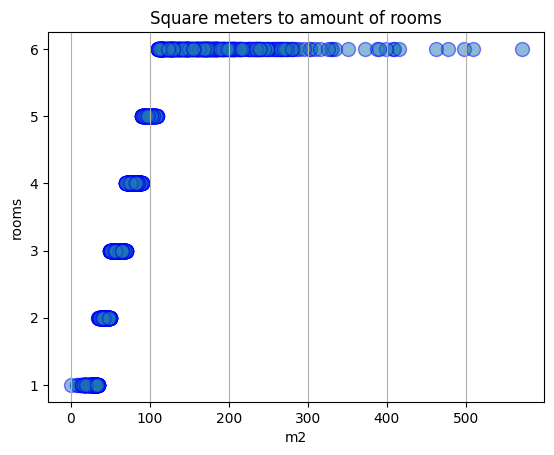

In [30]:
# looking at graphs
plt.scatter(data=df, x='total_m2', y='sobnost_ocenjena', s=100, alpha=0.5, edgecolors='blue' )
plt.title('Square meters to amount of rooms')
plt.xlabel("m2")
plt.ylabel("rooms")
plt.grid( axis= 'x')
plt.show()


In [31]:
df['price_per_m2'].describe()

c:\Users\gaj\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    2556.000000
mean             inf
std              NaN
min         2.941176
25%      3008.700795
50%      3732.280652
75%      4545.454545
max              inf
Name: price_per_m2, dtype: float64

In [40]:
# drop infinite and NaN
clean = df[~df['price_per_m2'].isin([np.inf, -np.inf])].dropna(subset=['price_per_m2'])

# (optionally) drop values that are clearly data‐entry errors
clean = clean[(clean['price_per_m2'] > 200) & (clean['price_per_m2'] < 10000)]


In [41]:
q = clean['price_per_m2'].quantile([0.05, 0.25, 0.50, 0.75, 0.95])  
print(q)


0.05    1497.821601
0.25    3025.477707
0.50    3732.638889
0.75    4545.454545
0.95    6280.198347
Name: price_per_m2, dtype: float64


In [43]:
cuts = [0, 0.25, 0.75, 0.95, 1.00]
labels = ['entry', 'mid', 'high', 'luxury']

clean['segment'] = pd.qcut(
    clean['price_per_m2'],
    q=cuts,
    labels=labels
)


In [44]:
clean.groupby('segment')['price_per_m2'] \
     .agg(['count','min','max','median']) \
     .rename(columns={'count':'n','min':'min_€/m2','max':'max_€/m2','median':'med_€/m2'})


C:\Users\gaj\AppData\Local\Temp\ipykernel_13436\1152443216.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clean.groupby('segment')['price_per_m2'] \


,n,min_€/m2,max_€/m2,med_€/m2
segment,,,,
entry,635,216.919740,3025.477707,2283.647944
mid,1271,3026.315789,4545.454545,3733.766234
high,504,4545.454545,6280.000000,4997.199750
luxury,127,6280.991736,9642.916060,7270.029674


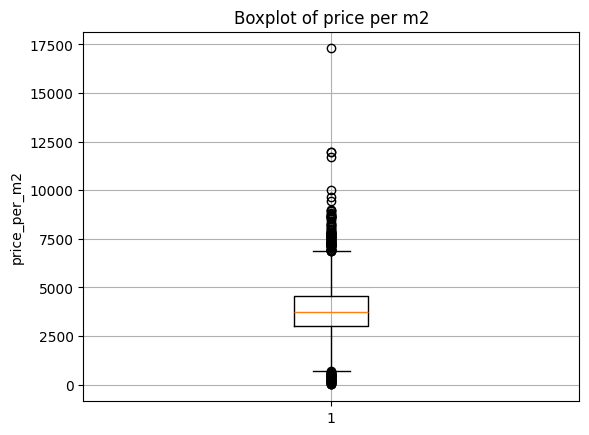

In [42]:
plt.boxplot(df['price_per_m2'])
plt.title("Boxplot of price per m2")
plt.ylabel("price_per_m2")
plt.grid()
plt.show()

In [34]:
Q10 = df['price_per_m2'].quantile(0.10)
Q90 = df['price_per_m2'].quantile(0.90)

print(f"10th percentile: {Q10}")
print(f"90th percentile: {Q90}")

10th percentile: 2061.855670103093
90th percentile: 5359.5932585060345


In [ ]:
#cleaning the data of excessive outliers
# 1. Izračun kvartilov za stolpec 'price'
Q1 = df['price_per_m2'].quantile(0.25)
Q3 = df['price_per_m2'].quantile(0.75)
IQR = Q3 - Q1

# 2. Meje za izločanje outlierjev
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. Filtriranje vrstic brez outlierjev
df_cut =df[(df['price_per_m2'] >= lower_bound) & (df['price_per_m2'] <= upper_bound)].copy()


comment: after we cut extreme low and high values, most of the real estate falls in price between what looks like 1400 per m2 and just below 2000m2.

In [ ]:
# 🔲 Subplot postavitev
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 vrstica, 2 stolpca

# Boxploti
axes[0].boxplot(df['price_per_m2'])
axes[0].set_title("before cleaning")
axes[0].set_ylabel("price")
axes[0].grid(axis='y')

axes[1].boxplot(df_cut["price_per_m2"])
axes[1].set_title("after cleaning")
axes[1].set_ylabel("price")
axes[1].grid(axis='y')



plt.suptitle("comparison of prices with and without outliers 2024")

plt.tight_layout()
plt.show()

In [ ]:
"""
#do a heatmap of the data
import seaborn as sns   
plt.figure(figsize=(12, 8))
# Select only numeric columns for the heatmap
numeric_cols = df_cut[['leto_izgradnje', 'total_m2', 'living_space', 'cena', 'is_apartment', 'price_per_m2', 'novogradnja_1']]
sns.heatmap(numeric_cols.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Real Estate Data')
"""

In [ ]:
df_cut.describe()

In [ ]:
df.sample(10)

In [ ]:
df_cut.to_csv(r"power_bi_ready\gurs_cut\realestate_2024.csv", index=False, encoding='utf-8')